In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

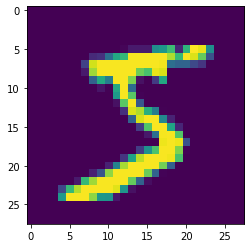

In [3]:
plt.imshow(train_images[0])

In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
train_images = train_images.reshape(train_images.shape[0], 28,28,1)

In [7]:
train_images = (train_images-127.5)/127.5

In [8]:
BUFFER_SIZE = train_images.shape[0]
BATCH_SIZE =100
train_dataset=tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

#DISCRIMINATOR MODEL

In [13]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(7,(3,3), padding="same", input_shape=(28,28,1)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    return model

In [14]:
model_discriminator = make_discriminator_model()

In [15]:
model_discriminator(np.random.rand(1,28,28,1).astype("float32"))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.29919034]], dtype=float32)>

In [17]:
discriminator_optimizer = tf.optimizers.Adam(1e-3)

In [48]:
def get_discriminator_loss(real_predictions, fake_predictions):
    real_predictions = tf.sigmoid(real_predictions)
    fake_predictions = tf.sigmoid(fake_predictions)
    real_loss = tf.losses.binary_crossentropy(tf.ones_like(real_predictions),real_predictions)
    fake_loss = tf.losses.binary_crossentropy(tf.zeros_like(fake_predictions),fake_predictions)
    return fake_loss+real_loss

#GENERATOR

In [49]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(7*7*256, input_shape = (100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Reshape((7,7,256)))
    model.add(tf.keras.layers.Conv2DTranspose(128,(3,3),padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2DTranspose(64,(3,3),strides = (2,2),padding="same"))
    model.add(tf.keras.layers.BatchNormalization()) 
    model.add(tf.keras.layers.Conv2DTranspose(1,(3,3),strides = (2,2),padding="same"))
    return model
              

In [50]:
generator = make_generator_model()

In [51]:
generator_optimizer = tf.optimizers.Adam(1e-4)

In [52]:
def get_generator_loss(fake_predictions):
    fake_predictions = tf.sigmoid(fake_predictions)
    fake_loss = tf.losses.binary_crossentropy(tf.ones_like(fake_predictions),fake_predictions)
    return fake_loss

#Training

In [53]:
def train(dataset, epochs):
    for _ in range(epochs):
        for images in dataset:
            images=tf.cast(images, tf.dtypes.float32)
            train_step(images)

In [54]:
def train_step(images):
    fake_image_noise=np.random.randn(BATCH_SIZE,100).astype("float32")
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images=generator(fake_image_noise)
        real_output=model_discriminator(images)
        fake_output=model_discriminator(generated_images)
        
        gen_loss=get_generator_loss(fake_output)
        disc_loss = get_discriminator_loss(real_output, fake_output)
        
        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, model_discriminator.trainable_variables)
        
        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, model_discriminator.trainable_variables))
        
        print("generator loss: ", np.mean(gen_loss))
        print("discriminator loss: ", np.mean(disc_loss))
    

In [55]:
train(train_dataset,2)

generator loss:  0.6930587
discriminator loss:  1.3044307
generator loss:  0.6996755
discriminator loss:  0.695683
generator loss:  0.7214619
discriminator loss:  0.666357
generator loss:  0.7577194
discriminator loss:  0.63282096
generator loss:  0.7968237
discriminator loss:  0.5996189
generator loss:  0.84983754
discriminator loss:  0.55814016
generator loss:  0.9143356
discriminator loss:  0.5126035
generator loss:  0.97657007
discriminator loss:  0.47326022
generator loss:  1.0468421
discriminator loss:  0.43314344
generator loss:  1.1485419
discriminator loss:  0.38221115
generator loss:  1.2638288
discriminator loss:  0.3332452
generator loss:  1.3698578
discriminator loss:  0.29449737
generator loss:  1.4853112
discriminator loss:  0.2581458
generator loss:  1.614973
discriminator loss:  0.22319569
generator loss:  1.7784555
discriminator loss:  0.18637621
generator loss:  1.9362521
discriminator loss:  0.1573052
generator loss:  2.1130543
discriminator loss:  0.13005395
genera

generator loss:  8.579878
discriminator loss:  0.008429717
generator loss:  8.922132
discriminator loss:  0.029848764
generator loss:  9.023233
discriminator loss:  0.010610575
generator loss:  9.26918
discriminator loss:  0.0613253
generator loss:  8.319182
discriminator loss:  0.04740602
generator loss:  7.9847646
discriminator loss:  0.069285914
generator loss:  9.92995
discriminator loss:  0.010797483
generator loss:  10.374263
discriminator loss:  0.058681387
generator loss:  9.832403
discriminator loss:  0.050700232
generator loss:  8.457054
discriminator loss:  0.06501233
generator loss:  9.2972
discriminator loss:  0.023214698
generator loss:  10.230634
discriminator loss:  0.008979716
generator loss:  11.659013
discriminator loss:  0.0034686085
generator loss:  11.534083
discriminator loss:  0.024292545
generator loss:  10.978851
discriminator loss:  0.0068369578
generator loss:  10.345712
discriminator loss:  0.02363912
generator loss:  10.158408
discriminator loss:  0.017485

generator loss:  7.319463
discriminator loss:  0.12730569
generator loss:  9.078628
discriminator loss:  0.025755774
generator loss:  10.504582
discriminator loss:  0.07376233
generator loss:  11.505232
discriminator loss:  0.03256019
generator loss:  11.5138035
discriminator loss:  0.085583836
generator loss:  10.348245
discriminator loss:  0.035067633
generator loss:  11.547882
discriminator loss:  0.01818636
generator loss:  10.593368
discriminator loss:  0.061735023
generator loss:  11.17782
discriminator loss:  0.050414704
generator loss:  9.119299
discriminator loss:  0.25639617
generator loss:  11.448399
discriminator loss:  0.10189029
generator loss:  11.89443
discriminator loss:  0.076883756
generator loss:  11.692158
discriminator loss:  0.081526324
generator loss:  10.239961
discriminator loss:  0.040130835
generator loss:  9.50516
discriminator loss:  0.02570653
generator loss:  8.721949
discriminator loss:  0.084818274
generator loss:  10.771488
discriminator loss:  0.0324

generator loss:  3.7889676
discriminator loss:  0.47749263
generator loss:  1.519233
discriminator loss:  0.7508809
generator loss:  3.195873
discriminator loss:  0.45700192
generator loss:  6.2156024
discriminator loss:  1.0408702
generator loss:  2.9705896
discriminator loss:  0.30340198
generator loss:  1.7913061
discriminator loss:  0.4958472
generator loss:  4.4636264
discriminator loss:  0.38269
generator loss:  5.3435316
discriminator loss:  0.6035702
generator loss:  3.1609714
discriminator loss:  0.37212777
generator loss:  1.9310917
discriminator loss:  0.49240375
generator loss:  3.1917448
discriminator loss:  0.29778224
generator loss:  4.9992747
discriminator loss:  0.24117047
generator loss:  5.166064
discriminator loss:  0.21920581
generator loss:  3.7647216
discriminator loss:  0.19372381
generator loss:  2.3619785
discriminator loss:  0.29637444
generator loss:  2.8130212
discriminator loss:  0.28555635
generator loss:  4.376204
discriminator loss:  0.23337139
generato

generator loss:  5.369958
discriminator loss:  0.2107019
generator loss:  4.4798183
discriminator loss:  0.20372634
generator loss:  4.3564396
discriminator loss:  0.1829881
generator loss:  4.4669256
discriminator loss:  0.16868666
generator loss:  4.376295
discriminator loss:  0.18217927
generator loss:  4.855018
discriminator loss:  0.08781431
generator loss:  5.5429187
discriminator loss:  0.14356877
generator loss:  5.1115856
discriminator loss:  0.25075492
generator loss:  3.4861462
discriminator loss:  0.25275344
generator loss:  3.4801373
discriminator loss:  0.19034958
generator loss:  5.7036138
discriminator loss:  0.20817605
generator loss:  4.6456676
discriminator loss:  0.13245618
generator loss:  4.1902113
discriminator loss:  0.17685646
generator loss:  3.8186584
discriminator loss:  0.15309572
generator loss:  4.8970695
discriminator loss:  0.1386416
generator loss:  4.3111773
discriminator loss:  0.1204445
generator loss:  4.8469014
discriminator loss:  0.10156965
gene

generator loss:  3.9253733
discriminator loss:  0.29293528
generator loss:  2.5285096
discriminator loss:  0.28897002
generator loss:  3.6623795
discriminator loss:  0.17154953
generator loss:  6.2987533
discriminator loss:  0.2550584
generator loss:  5.437772
discriminator loss:  0.17167802
generator loss:  2.8931298
discriminator loss:  0.20664696
generator loss:  2.8217628
discriminator loss:  0.15117514
generator loss:  4.4569674
discriminator loss:  0.14006391
generator loss:  5.7327795
discriminator loss:  0.17962243
generator loss:  4.7875614
discriminator loss:  0.22319598
generator loss:  2.4568
discriminator loss:  0.23570706
generator loss:  3.3421187
discriminator loss:  0.14402689
generator loss:  5.161444
discriminator loss:  0.18975383
generator loss:  5.869653
discriminator loss:  0.1485852
generator loss:  4.2334623
discriminator loss:  0.18122979
generator loss:  2.403659
discriminator loss:  0.27731612
generator loss:  3.8278282
discriminator loss:  0.14056478
genera

generator loss:  5.305922
discriminator loss:  0.19153546
generator loss:  3.8008797
discriminator loss:  0.22886111
generator loss:  3.8507698
discriminator loss:  0.29080278
generator loss:  4.5377393
discriminator loss:  0.2239878
generator loss:  4.684241
discriminator loss:  0.16351719
generator loss:  4.453838
discriminator loss:  0.19884339
generator loss:  4.4132223
discriminator loss:  0.14673229
generator loss:  4.904623
discriminator loss:  0.10116456
generator loss:  4.7872405
discriminator loss:  0.25717044
generator loss:  3.9376707
discriminator loss:  0.18771589
generator loss:  4.0624914
discriminator loss:  0.13929339
generator loss:  5.3734236
discriminator loss:  0.21455559
generator loss:  3.8003986
discriminator loss:  0.16155733
generator loss:  2.7885423
discriminator loss:  0.3122564
generator loss:  4.905712
discriminator loss:  0.15684205
generator loss:  5.636219
discriminator loss:  0.17740765
generator loss:  4.5733314
discriminator loss:  0.2247909
genera

generator loss:  4.3398023
discriminator loss:  0.11639638
generator loss:  5.360901
discriminator loss:  0.02983658
generator loss:  6.2486415
discriminator loss:  0.06468654
generator loss:  6.8517523
discriminator loss:  0.053004865
generator loss:  5.854651
discriminator loss:  0.08342807
generator loss:  4.8045125
discriminator loss:  0.08207993
generator loss:  4.3843203
discriminator loss:  0.1628847
generator loss:  4.788281
discriminator loss:  0.09835829
generator loss:  5.075956
discriminator loss:  0.06951139
generator loss:  5.741784
discriminator loss:  0.07388218
generator loss:  5.7584767
discriminator loss:  0.14796203
generator loss:  5.829991
discriminator loss:  0.070213765
generator loss:  5.4119983
discriminator loss:  0.09825209
generator loss:  5.008824
discriminator loss:  0.06778197
generator loss:  5.4968967
discriminator loss:  0.07307313
generator loss:  5.608863
discriminator loss:  0.074963525
generator loss:  5.7868567
discriminator loss:  0.09940475
gen

generator loss:  4.9773216
discriminator loss:  0.08722412
generator loss:  4.824775
discriminator loss:  0.11288753
generator loss:  5.891981
discriminator loss:  0.054054987
generator loss:  6.889943
discriminator loss:  0.23682831
generator loss:  4.7801194
discriminator loss:  0.10217088
generator loss:  3.7587228
discriminator loss:  0.15780279
generator loss:  4.787528
discriminator loss:  0.17845592
generator loss:  5.9824924
discriminator loss:  0.107633024
generator loss:  6.3926277
discriminator loss:  0.14079966
generator loss:  5.311682
discriminator loss:  0.16266455
generator loss:  5.263045
discriminator loss:  0.09212338
generator loss:  4.771156
discriminator loss:  0.18081102
generator loss:  4.694792
discriminator loss:  0.09139416
generator loss:  5.2811084
discriminator loss:  0.09061206
generator loss:  5.2088223
discriminator loss:  0.14939328
generator loss:  5.113571
discriminator loss:  0.11673915
generator loss:  4.81522
discriminator loss:  0.16240446
genera

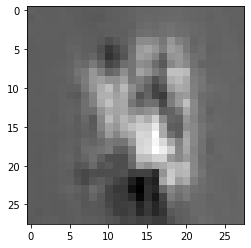

In [58]:
  plt.imshow(tf.reshape(generator(np.random.randn(1,100)),(28,28)),cmap="gray")